In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import copy
import random
import sys
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set()

%config InlineBackend.figure_format = 'retina'

from module import perceptron as module

# Testing on synthetic data

Main question: who will win: Perceptron or PerceptronBest? My guess is PerceptronBest should definitely beat stock Perceptron, since we store best weights.


## 1. Blobs data


__________Iteration number 0__________
__________Iteration number 500__________


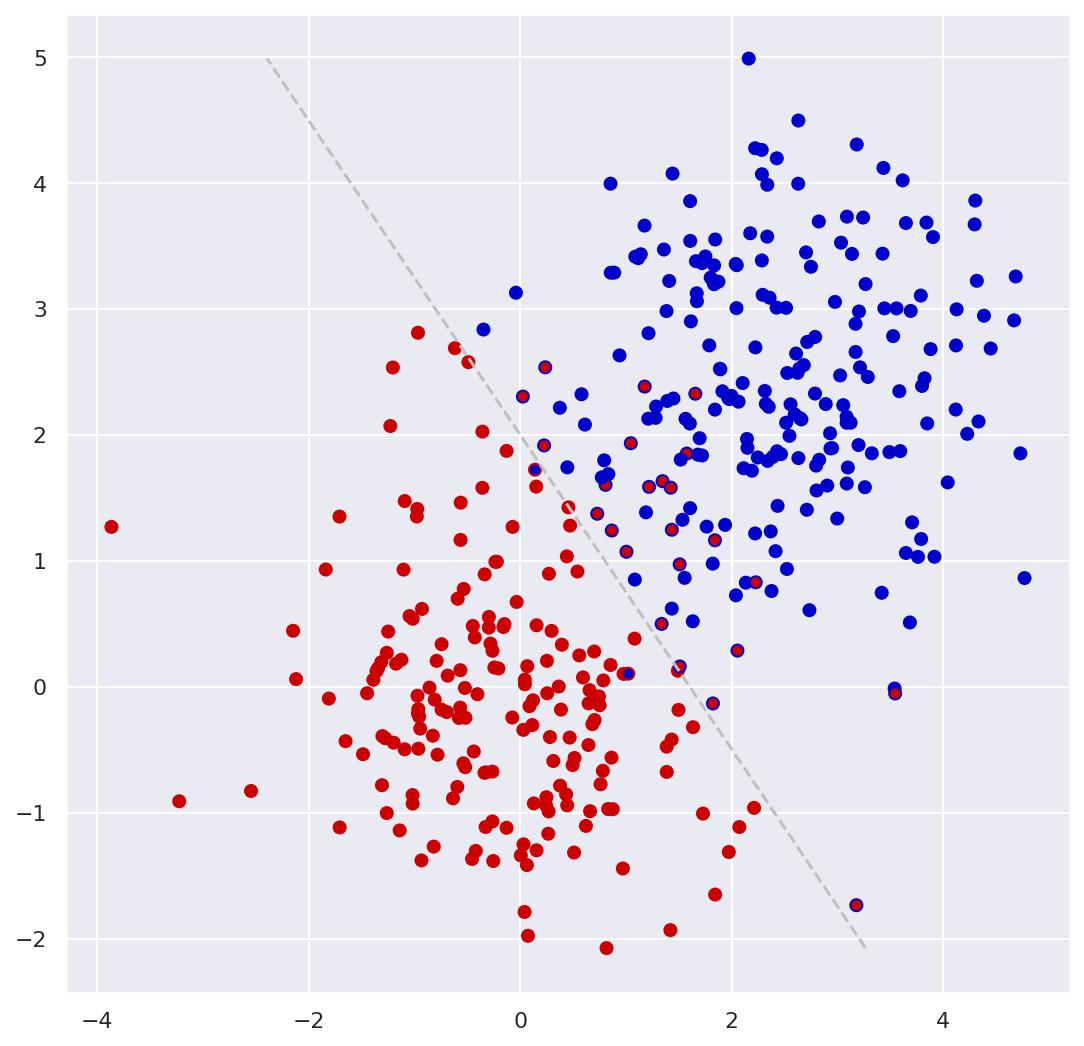

In [2]:
number_iters = 1000
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = module.Perceptron(iters=number_iters)
c.fit(X, true_labels)
module.visualize(X, true_labels, np.array(c.predict(X)), c.w)
stock_perc_ans = module.num_of_correct_preds(true_labels, np.array(c.predict(X)))


__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________


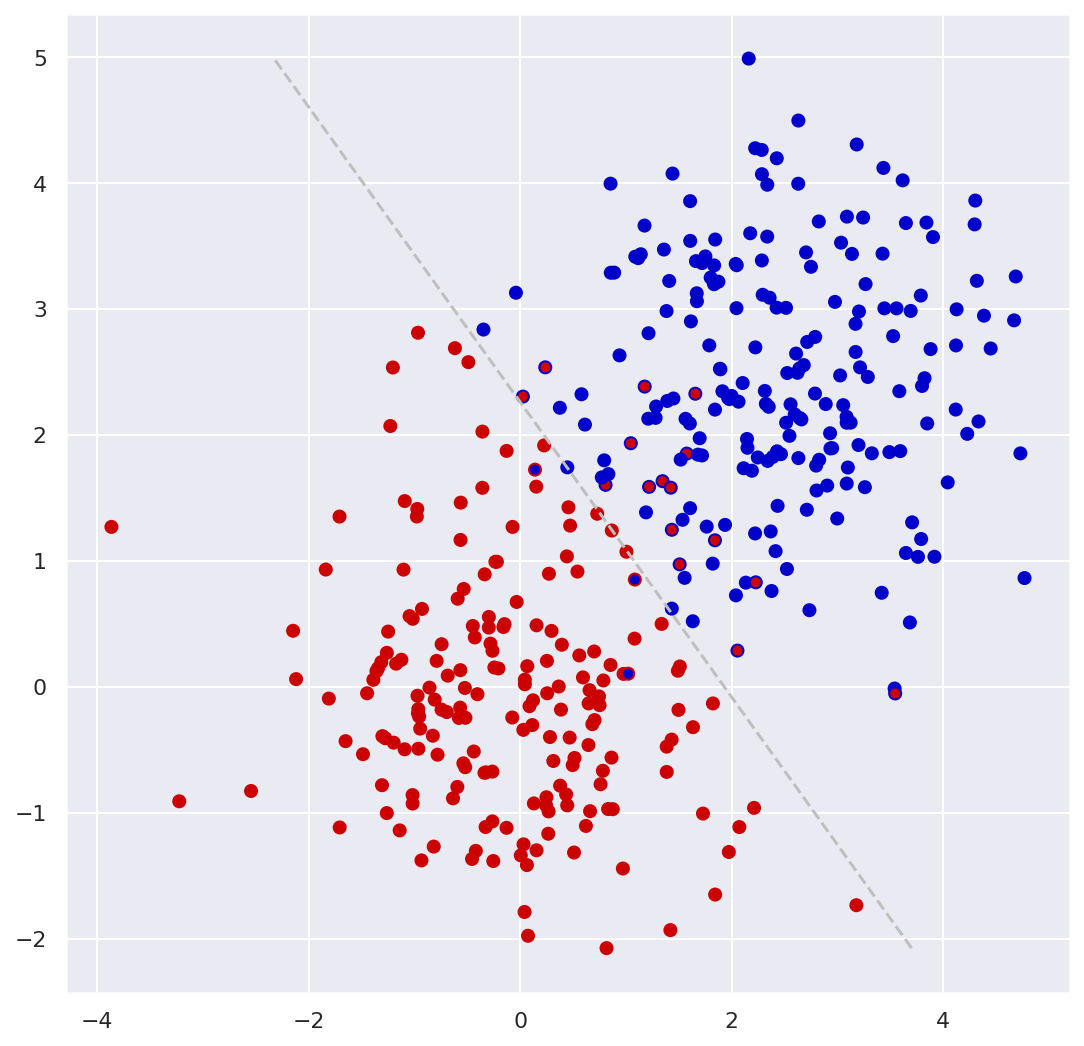

In [3]:
c_best = module.PerceptronBest(iters=number_iters)
c_best.fit(X, true_labels)
module.visualize(X, true_labels, np.array(c_best.predict(X)), c_best.w)
best_perc_ans = module.num_of_correct_preds(true_labels, np.array(c_best.predict(X)))

In [4]:
print(f'For the blob data with {number_iters} number of iterations the results for algorithms are:')
print(f'Perceptron gave {stock_perc_ans} incorrect answers')
print(f'But, PerceptronBest gave {best_perc_ans} incorrect answers!')

For the blob data with 1000 number of iterations the results for algorithms are:
Perceptron gave 26 incorrect answers
But, PerceptronBest gave 19 incorrect answers!


## 2. Moons data

__________Iteration number 0__________
__________Iteration number 500__________


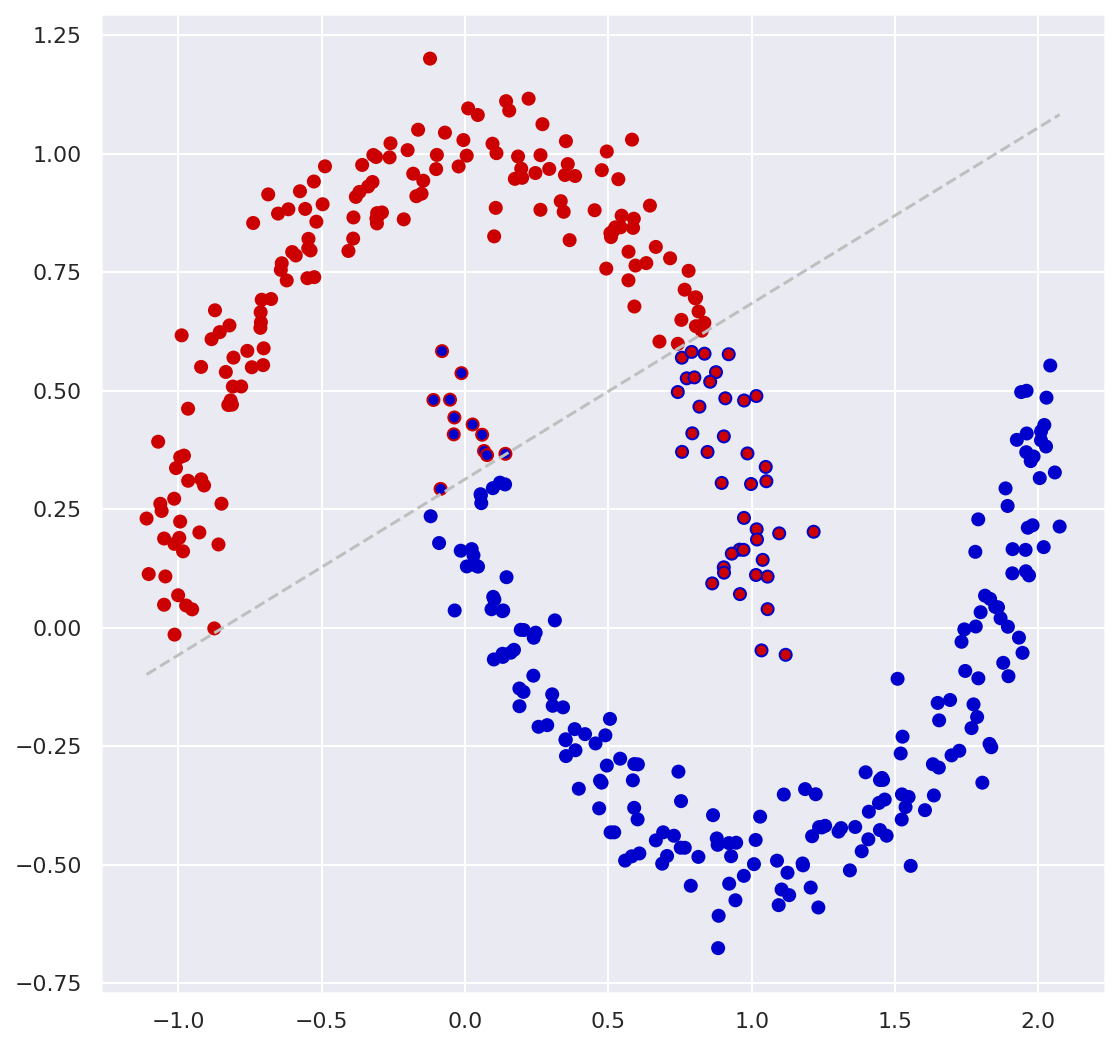

In [5]:
number_iters = 1000
X, true_labels = make_moons(400, noise=0.075)
c = module.Perceptron(iters=number_iters)
c.fit(X, true_labels)
module.visualize(X, true_labels, np.array(c.predict(X)), c.w)
stock_perc_ans = module.num_of_correct_preds(true_labels, np.array(c.predict(X)))

__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________


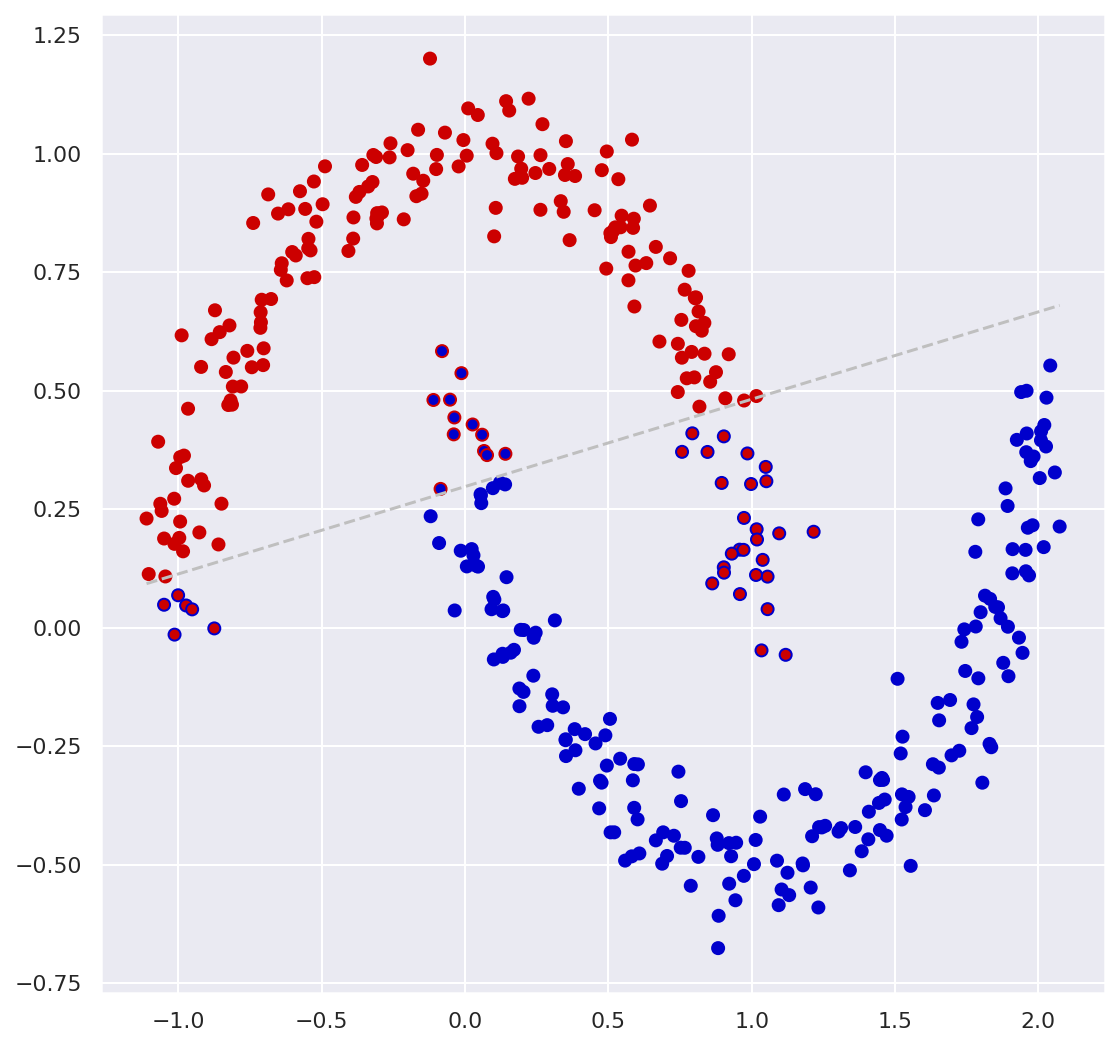

In [6]:
c_best = module.PerceptronBest(iters=number_iters)
c_best.fit(X, true_labels)
module.visualize(X, true_labels, np.array(c_best.predict(X)), c_best.w)
best_perc_ans = module.num_of_correct_preds(true_labels, np.array(c_best.predict(X)))

In [7]:
print(f'For the blob data with {number_iters} number of iterations the results for algorithms are:')
print(f'Perceptron gave {stock_perc_ans} incorrect answers')
print(f'But, PerceptronBest gave {best_perc_ans} incorrect answers!')

For the blob data with 1000 number of iterations the results for algorithms are:
Perceptron gave 52 incorrect answers
But, PerceptronBest gave 45 incorrect answers!


# Images

## Fitting Perceptron on images

## 1. Transform images

In [8]:
def get_pics(label):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    # mask = np.logical_or(labels == y0, labels == y1)
    mask = (labels == label)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = images
    return X


In [9]:
pics1, pics5 = get_pics(1), get_pics(5)


Printing first 30 examples of "ones"

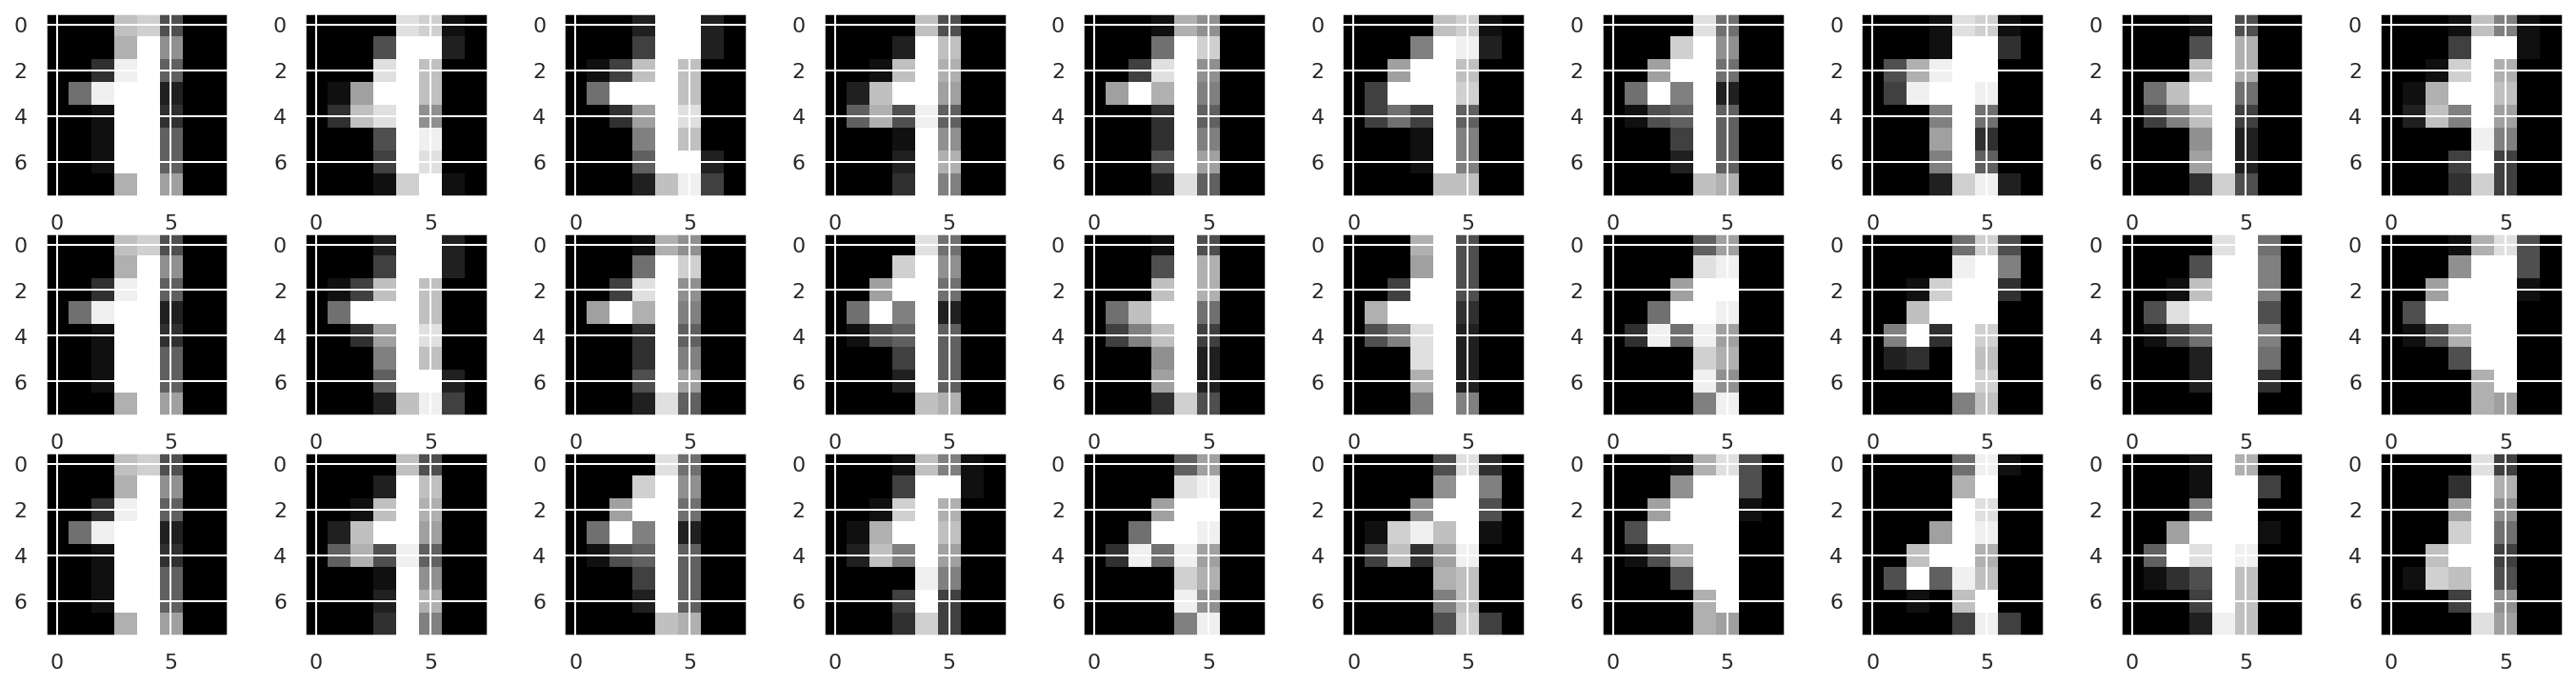

In [10]:
fig, axes = plt.subplots(3, 10, figsize=(24, 6))
for i in range(3):
    for k in range(10):
        axes[i][k].imshow(pics1[:30][k*(i+1)], 'gray')


Printing first 30 examples of "fives"

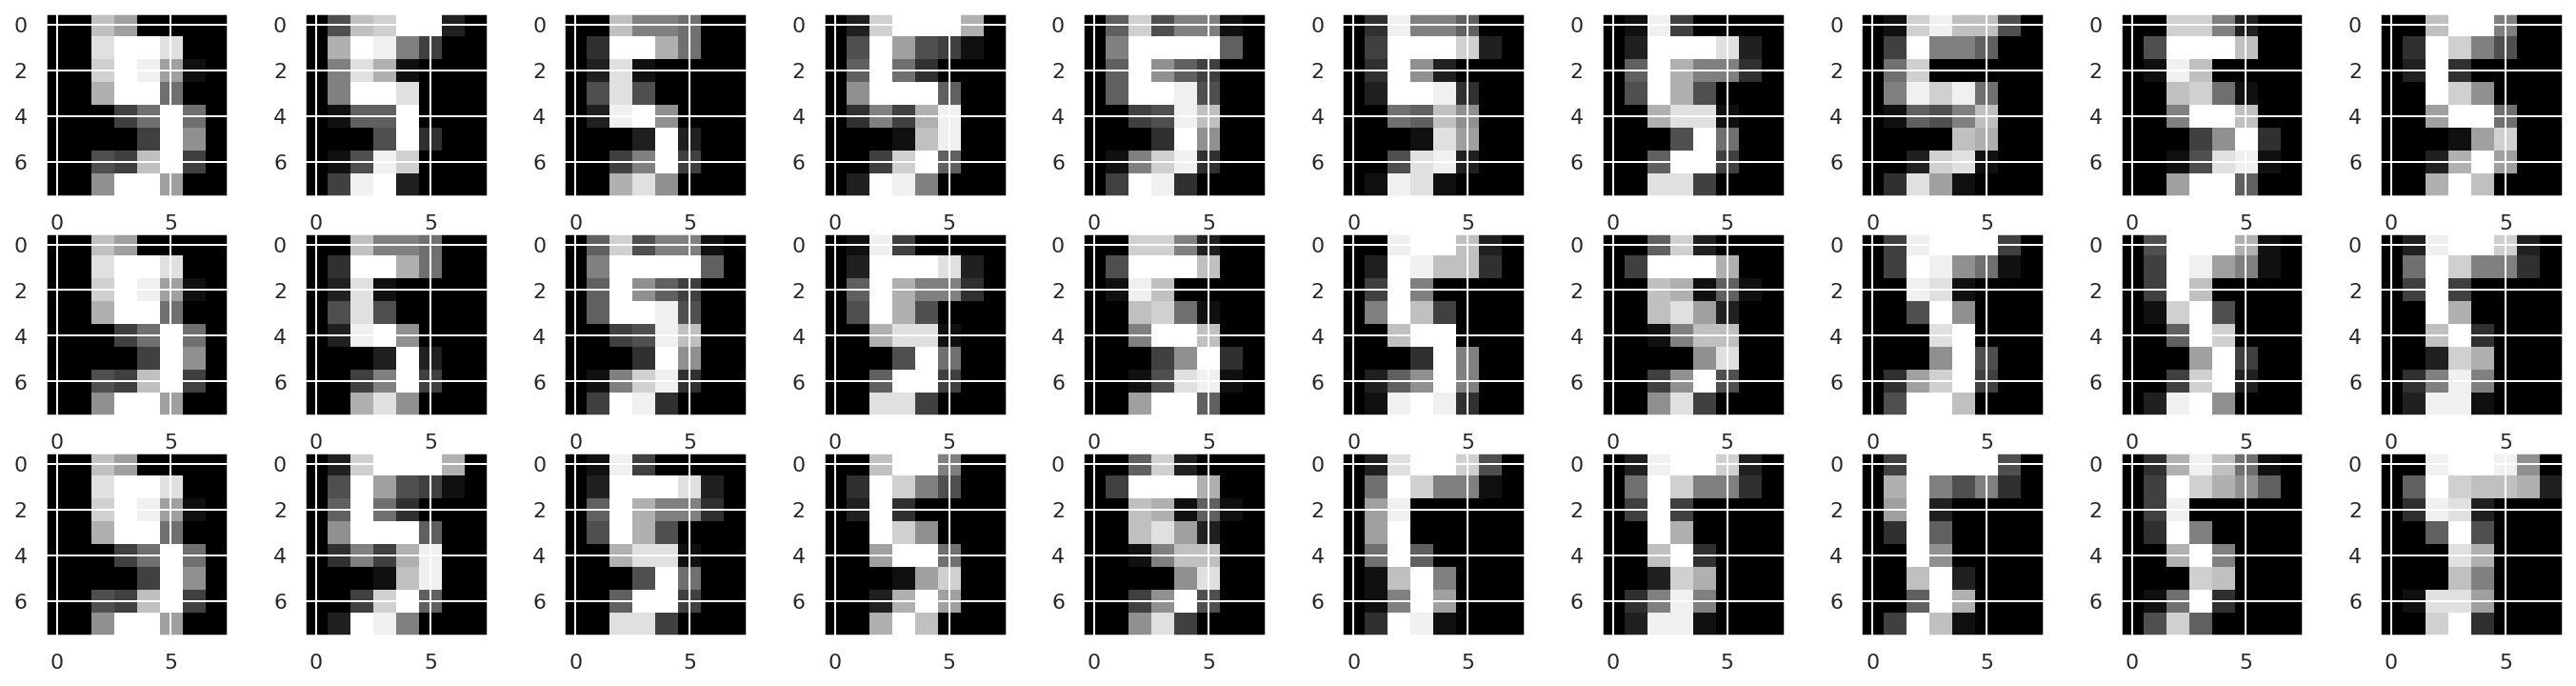

In [11]:
fig, axes = plt.subplots(3, 10, figsize=(24, 6))
for i in range(3):
    for k in range(10):
        axes[i][k].imshow(pics5[:30][k*(i+1)], 'gray')


Okay, so how we can transform our images? First thing first, we need to define the core differences between images of "1" and "5".
1. My first hypothesis is that for "1" 4-th and 5-th columns always filled with white color, on the other hand for "5" only half or something. 
2. All images of "5" have long white stripes on the top, but "1" have not. 

So, we can use these differences to make a hash for the images and let Perceptron model to fit better. Let's test these hypotheses on ones and fives.

Transform based on 4 and 5 column. 1 has 70%, 5 only 30%

In [12]:
def code_col(mat, j1, j2):
    mat = mat * 255
    res_col = np.sum(mat[:, j1:j2])
    res_all = np.sum(mat)

    return res_col / res_all

In [13]:
for i in range(30):
    one = code_col(pics1[i], 4, 5 + 1)
    five = code_col(pics5[i], 4, 5 + 1)
    print(f'For 1 percentage of 4-5 cols pixels is: {one:.2f}')

    print(f'For 5 percentage of 4-5 cols pixels is: {five:.2f}')

    print(5*'-' + 2 * r'\\' + 2* r'//' + 5*'-')

For 1 perscentage of 4-5 cols pixels is: 0.55
For 5 perscentage of 4-5 cols pixels is: 0.51
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.72
For 5 perscentage of 4-5 cols pixels is: 0.33
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.70
For 5 perscentage of 4-5 cols pixels is: 0.35
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.73
For 5 perscentage of 4-5 cols pixels is: 0.42
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.71
For 5 perscentage of 4-5 cols pixels is: 0.42
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.70
For 5 perscentage of 4-5 cols pixels is: 0.40
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.67
For 5 perscentage of 4-5 cols pixels is: 0.36
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.68
For 5 perscentage of 4-5 cols pixels is: 0.41
-----\\\\////-----
For 1 perscentage of 4-5 cols pixels is: 0.63
For 5 perscentage of 4-5 cols pixels is: 0.45
-----\\\\////-----
F

Transform based on 0, 1 rows. For 1 we have 10-15%, for 5 25-40%

In [14]:
def code_row(mat, i1, i2):
    mat = mat * 255
    res_row = np.sum(mat[i1:i2, :])
    res_all = np.sum(mat)

    return res_row / res_all

In [15]:
for i in range(30):
    one = code_row(pics1[i], 0, 1 + 1)
    five = code_row(pics5[i], 0, 1 + 1)
    print(f'For 1 perscentage of 0-2 rows pixels is: {one:.2f}')

    print(f'For 5 perscentage of 0-2 rows pixels is: {five:.2f}')

    print(5*'-' + 2 * r'\\' + 2* r'//' + 5*'-')

For 1 perscentage of 0-2 rows pixels is: 0.21
For 5 perscentage of 0-2 rows pixels is: 0.24
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.21
For 5 perscentage of 0-2 rows pixels is: 0.36
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.22
For 5 perscentage of 0-2 rows pixels is: 0.34
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.18
For 5 perscentage of 0-2 rows pixels is: 0.32
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.21
For 5 perscentage of 0-2 rows pixels is: 0.33
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.23
For 5 perscentage of 0-2 rows pixels is: 0.34
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.22
For 5 perscentage of 0-2 rows pixels is: 0.27
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.21
For 5 perscentage of 0-2 rows pixels is: 0.34
-----\\\\////-----
For 1 perscentage of 0-2 rows pixels is: 0.20
For 5 perscentage of 0-2 rows pixels is: 0.31
-----\\\\////-----
F

## 2. Transform and trying to fit

In [16]:
def code_col(mat, j1, j2):
    mat = mat * 255
    res_col = np.sum(mat[:, j1:j2])
    res_all = np.sum(mat)

    return res_col / res_all

def code_row(mat, i1, i2):
    mat = mat * 255
    res_row = np.sum(mat[i1:i2, :])
    res_all = np.sum(mat)

    return res_row / res_all

def transform_images(images):
    res = np.zeros((images.shape[0], 2))
    for ind, mat in enumerate(images):
        res[ind, 0] = code_col(mat, 4, 5 + 1)
        res[ind, 1] = code_row(mat, 0, 1 + 1)
    return res

In [17]:
train_ids, test_ids = pd.read_csv("data/x_digits_train.csv"), pd.read_csv("data/x_digits_test.csv")

X_train, y_train, X_test, y_test = module.get_x_y(train_ids, test_ids)

y_train = np.vectorize(lambda x, d={1:1, 5: 0}: d[x])(y_train)
y_test= np.vectorize(lambda x, d={1:1, 5: 0}: d[x])(y_test)

### Fitting Perceptron

In [18]:
c = module.Perceptron()
c.fit(X_train, y_train)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

__________Iteration number 0__________
Accuracy: 0.8767123287671232


In [19]:
c_best = module.PerceptronBest(learning_rate=0.03, iters=20000)
c_best.fit(X_train, y_train)
print("Accuracy:", np.mean(c_best.predict(X_test) == y_test))

__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 1000__________
__________Iteration number 1500__________
__________Iteration number 2000__________
__________Iteration number 2500__________
__________Iteration number 3000__________
__________Iteration number 3500__________
__________Iteration number 4000__________
__________Iteration number 4500__________
__________Iteration number 5000__________
__________Iteration number 5500__________
__________Iteration number 6000__________
__________Iteration number 6500__________
__________Iteration number 7000__________
__________Iteration number 7500__________
__________Iteration number 8000__________
__________Iteration number 8500__________
__________Iteration number 9000__________
__________Iteration number 9500__________
__________Iteration number 10000__________
__

Looks like both models performed well, but PerceptronBest was better. Let's submit this result in system.

## 3. Submission

In [20]:
y_pred = c_best.predict(X_test)
y_pred = np.vectorize(lambda x, d={1:1, 0: 5}: d[x])(y_pred)

submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test_ids['Id']
submission["Expected"] = y_pred
submission.to_csv('submission3.csv', index=False)

# Testing all pairs

We got nice results for pair (1, 5), let's test if Perceptron model is able to perform well on other pairs with this transformation.

In [21]:
accs = []
pair_scores = {}
i = 0
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 9+1)]:
  # print(i)
  # i+=1
  # print(y0, y1)
    X_train, X_test, y_train, y_test = module.get_x_y_(y0, y1)
    y_train = np.vectorize(lambda x, d={y0:1, y1: 0}: d[x])(y_train)
    y_test= np.vectorize(lambda x, d={y0:1, y1: 0}: d[x])(y_test)
    c = module.PerceptronBest(iters=1000)
    c.fit(X_train, y_train)
    score = np.mean(c.predict(X_test) == y_test)
    accs.append(score)
    pair_scores[(y0, y1)] = np.round(score, 2)
    # print(f'Pair {y0}, {y1} acc_score is {score:.2f}')
print("Mean accuracy:", np.mean(accs))

__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
updating weights
updating weights
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
__________Iteration number 500__________
__________Iteration number 0__________
updating weights
updating weights
updat

In [22]:
pair_scores

{(0, 1): 0.83,
 (0, 2): 0.62,
 (0, 3): 0.99,
 (0, 4): 0.9,
 (0, 5): 0.62,
 (0, 6): 0.92,
 (0, 7): 0.81,
 (0, 8): 0.8,
 (0, 9): 0.92,
 (1, 2): 0.82,
 (1, 3): 0.9,
 (1, 4): 0.93,
 (1, 5): 0.86,
 (1, 6): 0.88,
 (1, 7): 0.86,
 (1, 8): 0.65,
 (1, 9): 0.64,
 (2, 3): 0.88,
 (2, 4): 0.93,
 (2, 5): 0.56,
 (2, 6): 0.97,
 (2, 7): 0.76,
 (2, 8): 0.68,
 (2, 9): 0.54,
 (3, 4): 0.99,
 (3, 5): 0.84,
 (3, 6): 0.99,
 (3, 7): 0.78,
 (3, 8): 0.85,
 (3, 9): 0.68,
 (4, 5): 0.96,
 (4, 6): 0.66,
 (4, 7): 0.96,
 (4, 8): 0.93,
 (4, 9): 0.97,
 (5, 6): 0.95,
 (5, 7): 0.77,
 (5, 8): 0.79,
 (5, 9): 0.77,
 (6, 7): 0.97,
 (6, 8): 0.85,
 (6, 9): 0.97,
 (7, 8): 0.77,
 (7, 9): 0.72,
 (8, 9): 0.7}

We see that on some pairs score is awesome (3, 4), (4, 7), (1, 4) and others. 
Well, it's not that weird since these numbers looks kinda similar to (1, 5). 
But the fact that we got pairs with score almost equal to 1 is surprising and crazy town. Miracle machine learning!